### Exercise 1

Recall that $ n! $ is read as “$ n $ factorial” and defined as
$ n! = n \times (n - 1) \times \cdots \times 2 \times 1 $

In Julia you can compute this value with `factorial(n)`

Write your own version of this function, called `factorial2`, using a `for` loop


<a id='jbe-ex2'></a>

In [17]:
function factorial2(n)
    x=1
    for i in 1:n
        x=x*i
    end
    return x
end

factorial2(5)

120

### Exercise 2

The [binomial random variable](https://en.wikipedia.org/wiki/Binomial_distribution) $ Y \sim Bin(n, p) $ represents

- number of successes in $ n $ binary trials  
- each trial succeeds with probability $ p $  


Using only `rand()` from the set of Julia’s built-in random number
generators (not the `Distributions` package), write a function `binomial_rv` such that `binomial_rv(n, p)` generates one draw of $ Y $

Hint: If $ U $ is uniform on $ (0, 1) $ and $ p \in (0,1) $, then the expression `U < p` evaluates to `true` with probability $ p $


<a id='jbe-ex3'></a>

In [82]:
function binomial_rv(n,p)
    x = rand(n) #generates random number between 0 and 1 is standard definition of rand(n)
    y = count(i->(i<=p),x)
    return x, y
end

binomial_rv(100,0.5)

([0.305188, 0.474728, 0.373808, 0.39398, 0.0187313, 0.764561, 0.0289187, 0.235394, 0.716483, 0.0965694  …  0.870327, 0.713735, 0.0821257, 0.364229, 0.617204, 0.429236, 0.106032, 0.577806, 0.43855, 0.968724], 51)

# Exercise 3

Compute an approximation to $ \pi $ using Monte Carlo

For random number generation use only `rand()`

Your hints are as follows:

- If $ U $ is a bivariate uniform random variable on the unit square $ (0, 1)^2 $, then the probability that $ U $ lies in a subset $ B $ of $ (0,1)^2 $ is equal to the area of $ B $  
- If $ U_1,\ldots,U_n $ are iid copies of $ U $, then, as $ n $ gets larger, the fraction that falls in $ B $ converges to the probability of landing in $ B $  
- For a circle, area = π * $ radius^2 $  



<a id='jbe-ex4'></a>

In [11]:
function approx(n)
    s = 0
    a = 0
    x = zeros(n)
    y = zeros(n)
    for i in 1:n
        x[i]=rand()
        y[i]=rand()
        if x[i]*x[i] + y[i]*y[i]<=1
        s = s + 1
        end
        a = (s * 4) / n
    end
return a
end

approx(5000)

3.168

### Exercise 4

Write a program that prints one realization of the following random device:

- Flip an unbiased coin 10 times  
- If 3 consecutive heads occur one or more times within this sequence, pay one dollar  
- If not, pay nothing  


Once again use only `rand()` as your random number generator


<a id='jbe-ex5'></a>

In [68]:
function gamble(n)
    p = 0
    c = 0
    x = rand(("H","T"),n)
    for i in 2:n-1
        x[i]=="H" && x[i-1]=="H" && x[i+1]=="H" ? c=c+1 : c=c
    end
    c > 0 ? p=p-1 : p=p
    return x, c, p
end

gamble(10)

(["H", "T", "H", "T", "H", "H", "T", "T", "H", "T"], 0, 0)

### Exercise 5

Simulate and plot the correlated time series

$$
x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,n
$$

The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal

Set $ n = 200 $ and $ \alpha = 0.9 $


<a id='jbe-ex6'></a>

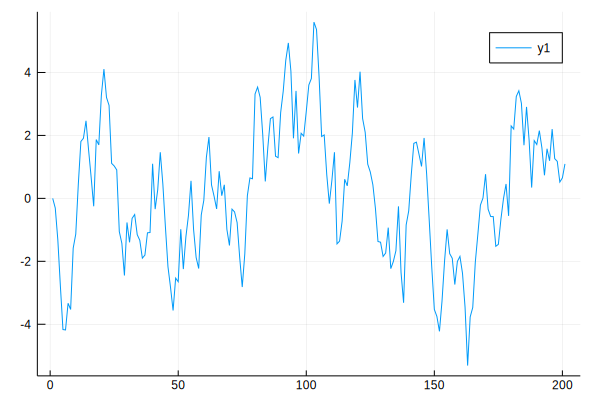

In [95]:
using Plots, Distributions
function series(α,n)
    d = Normal(0,1)
    ϵ = rand(d,n)
    x = zeros(n+1,1)
    for i in 1:n
        x[i+1] = α*x[i]+ϵ[i]
    end
    plot(1:n+1,x)
end

series(0.9,200)

### Exercise 6

Plot three simulated time series, one for each of the cases $ \alpha = 0 $, $ \alpha = 0.8 $ and $ \alpha = 0.98 $

(The figure will illustrate how time series with the same one-step-ahead conditional volatilities, as these three processes have, can have very different unconditional volatilities)


<a id='jbe-ex7'></a>

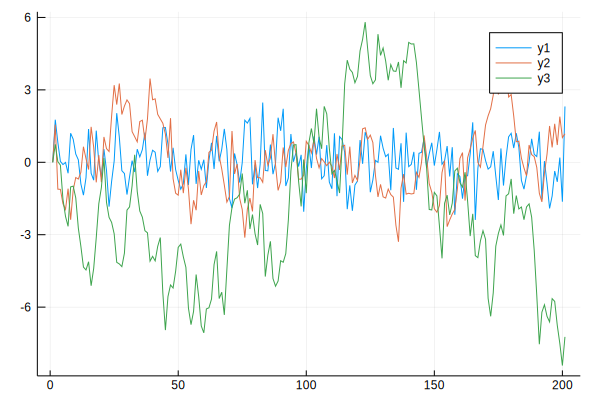

In [94]:
using Plots, Distributions

function series(α,n)
    d = Normal(0,1)
    ϵ = rand(d,n)
    x = zeros(n+1,1)
    for i in 1:n
        x[i+1] = α*x[i]+ϵ[i]
    end
    return x
end

plot(1:200+1,series(0.0,200))
plot!(1:200+1,series(0.8,200))
plot!(1:200+1,series(0.98,200))

### Exercise 7

This exercise is more challenging

Take a random walk, starting from $ x_0 = 1 $

$$
x_{t+1} = \, \alpha \, x_t + \sigma\, \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 1
\quad \text{and} \quad t = 0,\ldots,t_{\max}
$$

- Furthermore, assume that the $ x_{t_{\max}} = 0 $  (i.e. at $ t_{\max} $, the value drops to zero, regardless of its current state)  
- The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal  
- For a given path $ \{x_t\} $ define a **first-passage time** as $ T_a = \min\{t\, |\, x_t \leq a\} $, where by the assumption of the process $ T_a \leq t_{\max} $  


Start with $ \sigma = 0.2, \alpha = 1.0 $

1. calculate the first-passage time, $ T_0 $, for 100 simulated random walks – to a $ t_{\max} = 200 $ and plot a histogram  
1. plot the sample mean of $ T_0 $ from the simulation for $ \alpha \in \{0.8, 1.0, 1.2\} $  



<a id='jbe-ex8a'></a>

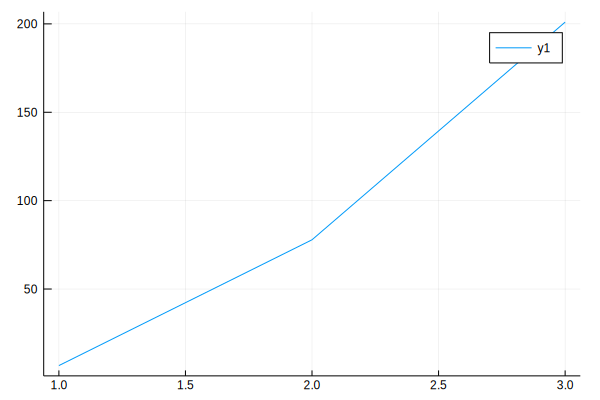

In [23]:
using Plots, Distributions

function series(a, α, σ, n, t)
    d = Normal(0,1)
    ϵ = rand(d,n,t)
    x = ones(n+1,t)
    y = zeros(t)
    
    for j in 1:t
        for i in 1:n
            x[i+1,j] = α*x[i,j]+σ*ϵ[i,j]
        end
        x[n+1,j] = 0
        y[j] = findfirst(i->i<=a,x[:,j])
    end
    
    return y
end

histogram(series(0.3,1,0.2,200,100), bins = 100)
μ = [mean(series(0.3,0.8,0.2,200,100)), mean(series(0.3,1,0.2,200,100)), mean(series(0.3,1.2,0.2,200,100))]
plot(1:3,μ)

### Exercise 8(a)

This exercise is more challenging

The root of a univariate function $ f(\cdot) $ is an $ x $ such that $ f(x) = 0 $

One solution method to find local roots of smooth functions is called Newton’s method

Starting with an $ x_0 $ guess, a function $ f(\cdot) $ and the first-derivative $ f'(\cdot) $, the algorithm is to repeat

$$
x^{n+1} = x^n - \frac{f(x^n)}{f'(x^n)}
$$

until $ | x^{n+1} - x^n| $ is below a tolerance

1. Use a variation of the `fixedpointmap` code to implement Newton’s method, where the function would accept arguments `f, f_prime, x_0, tolerance, maxiter`  
1. Test it with $ f(x) = (x-1)^3 $ and another function of your choice where you can analytically find the derivative  

In [95]:
using ForwardDiff #not sure hot to include the f_prime function so I did it inside  the function

function fixedpoint(f, x_0, tolerance, maxiter)
    D(f) = x -> ForwardDiff.derivative(f,x)
    f_prime = D(f)
    k = zeros(maxiter+1)
    k[1] = x_0
    l = zeros(maxiter)
    
    for i in 1:maxiter
        k[i+1] = k[i]-f(k[i])/f_prime(k[i])
        l[i] = k[i+1]-k[i]
    end
    
u = findfirst(i->abs(i)<tolerance,l)
return k[u]
    
end

fixedpoint(x->x^2-3,2,0.01,50)

1.7321428571428572

### Exercise 8(b)

For those impatient to use more advanced features of Julia, implement a version of Exercise 8(a) where `f_prime` is calculated with auto-differentiation

In [66]:
using ForwardDiff

# operator to get the derivative of this function using AD
D(f) = x -> ForwardDiff.derivative(f, x)

# example usage: create a function and get the derivative
f(x) = x^2
f_prime = D(f)

f(0.1), f_prime(0.1)

(0.010000000000000002, 0.2)

1. Using the `D(f)` operator definition above, implement a version of Newton’s method that does not require the user to provide an analytical derivative  
1. Test the sorts of `f` functions which can be automatically integrated by `ForwardDff.jl`  